# Import

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import plot_model

import warnings
warnings.filterwarnings("ignore")

print(tf.__version__)

1.15.0


Using TensorFlow backend.


# Loading the Dataset

In [2]:
cifar10 = keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


# Pre processing and Plotting the data

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

print("train_images.shape", train_images.shape)

print("length of train_labels",len(train_labels))

print("train_labels",train_labels)
test_images=test_images[1:9985]
print("test_images.shape",test_images.shape)
test_labels=test_labels[1:9985]
print("length of test_labels",len(test_labels))


train_images.shape (50000, 32, 32, 3)
length of train_labels 50000
train_labels [[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
test_images.shape (9984, 32, 32, 3)
length of test_labels 9984


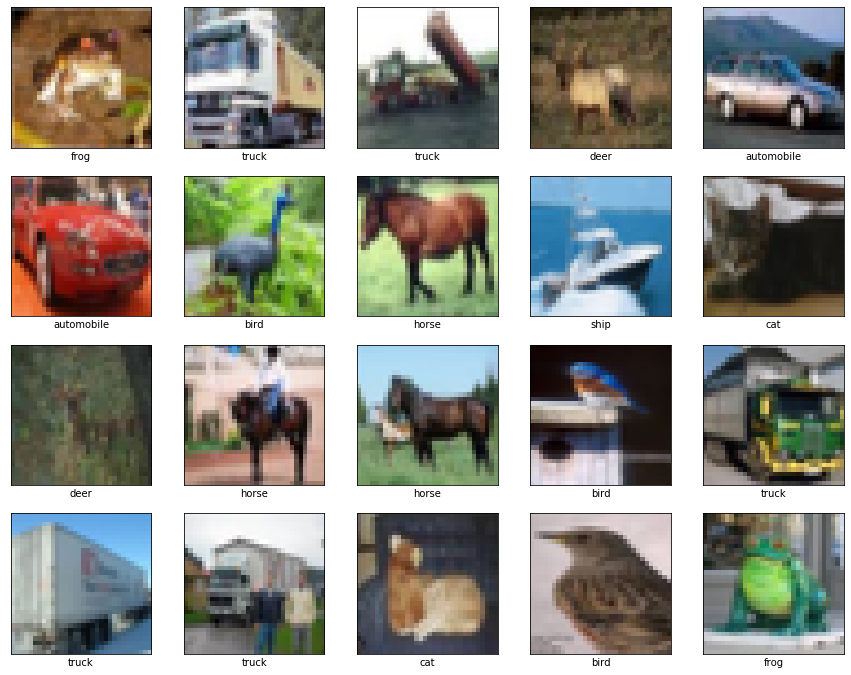

In [4]:
plt.figure(figsize=(15,15))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[int(train_labels[i])])
plt.show()

# ANN Model

INFO:tensorflow:Single-worker CollectiveAllReduceStrategy with local_devices = ('/device:GPU:0',), communication = CollectiveCommunication.NCCL
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 3072)              9440256   
_________________________________________________________________
dense_10 (Dense)             (None, 1536)              4720128   
_________________________________________________________________
dense_11 (Dense)             (None, 1024)              1573888   
_________________________________________________________________
dense_12 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_13 (Dense)             (None, 512)  

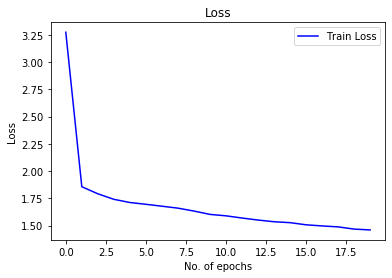

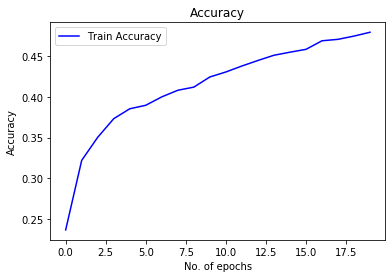

312/312 [==============================] - 2s 6ms/step - loss: 1.5394 - acc: 0.4491
Test accuracy: 0.44911858
[0.02972512 0.5312793  0.00393995 0.00441582 0.00090063 0.00228994
 0.00095425 0.00195232 0.09406886 0.33047387]
1


In [6]:
multiworker_strategy = tf.distribute.experimental.MultiWorkerMirroredStrategy(tf.distribute.experimental.CollectiveCommunication.NCCL)

with multiworker_strategy.scope():
  model = tf.keras.Sequential([
    
      tf.keras.layers.Flatten(input_shape=(32,32,3)),
      tf.keras.layers.Dense(3072, activation=tf.nn.relu),

      tf.keras.layers.Dense(1536, activation=tf.nn.relu),
      
      tf.keras.layers.Dense(1024, activation=tf.nn.relu),
      tf.keras.layers.Dense(1024, activation=tf.nn.relu),

      tf.keras.layers.Dense(512, activation=tf.nn.relu),
      tf.keras.layers.Dense(512, activation=tf.nn.relu),
      

      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),

      tf.keras.layers.Dense(64, activation=tf.nn.relu),
      tf.keras.layers.Dense(64, activation=tf.nn.relu),

      tf.keras.layers.Dense(10, activation=tf.nn.softmax)
  ])

  model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()
#plot_model(model, to_file='model.png')

  

history = model.fit(train_images, train_labels, epochs=20)#, validation_split=0.1, shuffle=True, verbose=1)

plt.plot(history.history['loss'],color='blue',label='Train Loss')
#plt.plot(history.history['val_loss'],color='red',label='Valid Loss')
plt.title('Loss')
plt.legend()
plt.xlabel('No. of epochs')
plt.ylabel('Loss')
plt.show()
plt.plot(history.history['acc'],color='blue',label='Train Accuracy')
#plt.plot(history.history['val_acc'],color='red',label='Valid Accuracy')
plt.legend()
plt.title('Accuracy')
plt.xlabel('No. of epochs')
plt.ylabel('Accuracy')
plt.show()

test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

predictions = model.predict(test_images)
print(predictions[0])
print(np.argmax(predictions[0]))



# Plotting and Predictions

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

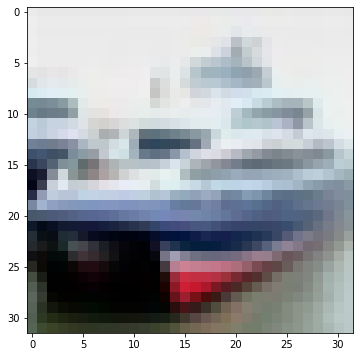

[8]
ship


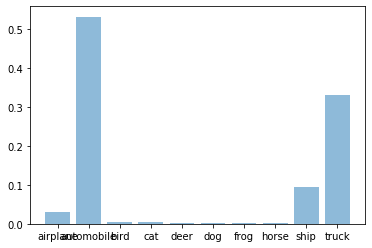

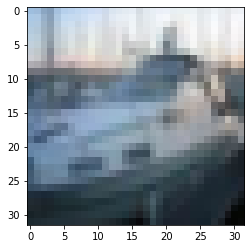

[8]
ship


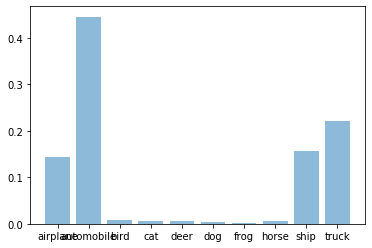

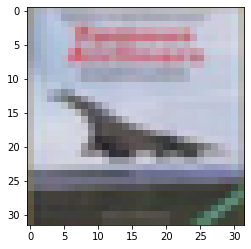

[0]
airplane


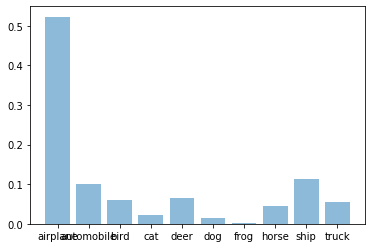

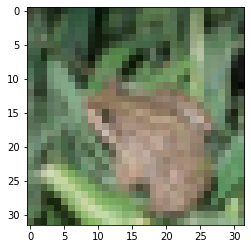

[6]
frog


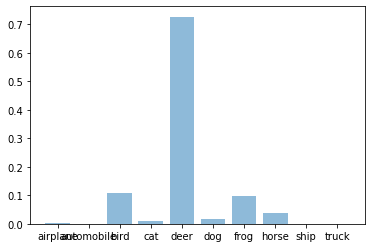

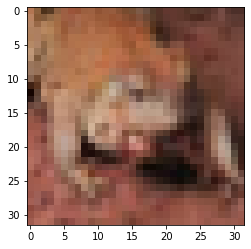

[6]
frog


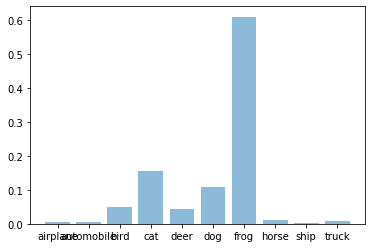

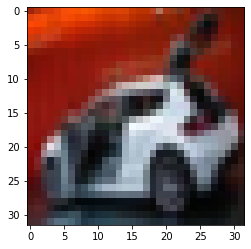

[1]
automobile


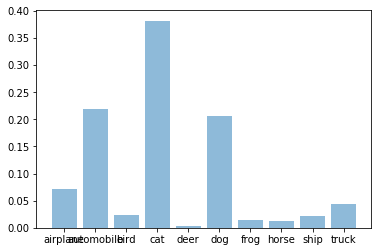

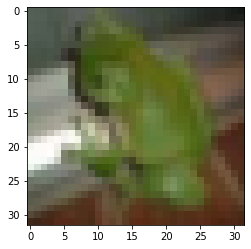

[6]
frog


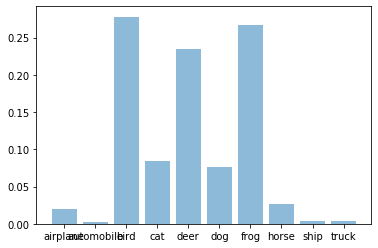

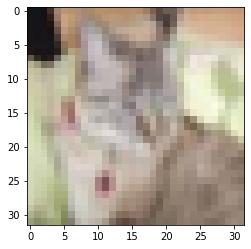

[3]
cat


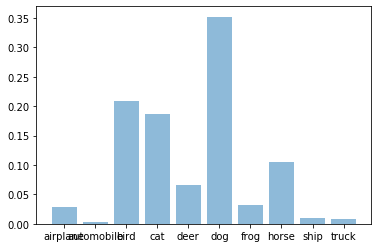

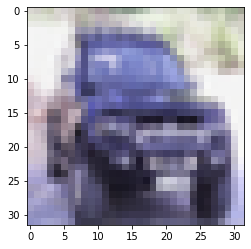

[1]
automobile


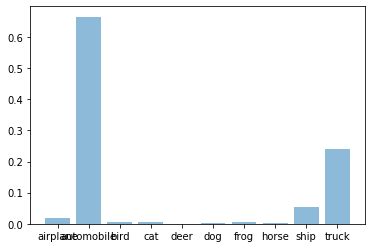

In [8]:

num_rows = 3
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.imshow(test_images[i])
  plt.show()
  print(test_labels[i])
  print(class_names[int(test_labels[i])])
  #print(predictions[i,:])
  plt.bar(class_names, predictions[i,:], align='center', alpha=0.5)
  plt.show()

